In [3]:
import pandas as pd
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [7]:
stats =  {}
x = 18
for y in range (1999, 2022):
   
    if y == 2021:
        x = 19
    for i in range(1,x):
        path_name = f"/Users/composerinmaking/Downloads/data-master/weekly/{y}/Week{i}.csv"
        
        data = pd.read_csv(path_name)
    
        for i in data.index:
            Player = data['Player'][i]
            SFP =  data['StandardFantasyPoints'][i]
            PPR = data['PPRFantasyPoints'][i]
            HPPR = data['HalfPPRFantasyPoints'][i]
            if Player not in stats: 
                stats[Player] = [[SFP], [PPR], [HPPR]]
            
            else: 
                stats[Player][0].append(SFP)
                stats[Player][1].append(PPR)
                stats[Player][2].append(HPPR)
    print(y, " finished")
stats1 = pd.DataFrame.from_dict(stats, orient = "index", columns=['SFP', 'PPR', 'HPPR'])

stats1.loc['Amari Cooper', 'SFP'][0:5]
stats1.loc['Amari Cooper', 'PPR'][0:5]
stats1.loc['Amari Cooper', 'HPPR'][0:5]
m , n= stats1.shape

df = pd.DataFrame(columns = ['InputSFP', 'OutputSFP', 'InputPPR', 'OutputPPR', 'InputHPPR', 'OutputHPPR'])

for i in range(0, m): 
    weeks_played = len(stats1.iloc[i]['SFP'])
    #print(weeks_played)
    for x in range(weeks_played - 5 -1): 
        input_data = stats1.iloc[i]['SFP'][x:x+5]
        output_data = stats1.iloc[i]['SFP'][x+5]
        input_data1 = stats1.iloc[i]['PPR'][x:x+5]
        output_data1 = stats1.iloc[i]['PPR'][x+5]
        input_data2 = stats1.iloc[i]['HPPR'][x:x+5]
        output_data2 = stats1.iloc[i]['HPPR'][x+5]
        df.loc[len(df.index)] = [input_data, output_data, input_data1, output_data1, input_data2, output_data2]
    print(i, " finished")    
        
    
        #print (output_data)
        #print (input_data)
#df.head()
df.to_csv("football_data.csv",index = False)


1999  finished
2000  finished
2001  finished
2002  finished
2003  finished
2004  finished
2005  finished
2006  finished
2007  finished
2008  finished
2009  finished
2010  finished
2011  finished
2012  finished
2013  finished
2014  finished
2015  finished
2016  finished
2017  finished
2018  finished
2019  finished
2020  finished
2021  finished
0  finished
1  finished
2  finished
3  finished
4  finished
5  finished
6  finished
7  finished
8  finished
9  finished
10  finished
11  finished
12  finished
13  finished
14  finished
15  finished
16  finished
17  finished
18  finished
19  finished
20  finished
21  finished
22  finished
23  finished
24  finished
25  finished
26  finished
27  finished
28  finished
29  finished
30  finished
31  finished
32  finished
33  finished
34  finished
35  finished
36  finished
37  finished
38  finished
39  finished
40  finished
41  finished
42  finished
43  finished
44  finished
45  finished
46  finished
47  finished
48  finished
49  finished
50  finished
51

573  finished
574  finished
575  finished
576  finished
577  finished
578  finished
579  finished
580  finished
581  finished
582  finished
583  finished
584  finished
585  finished
586  finished
587  finished
588  finished
589  finished
590  finished
591  finished
592  finished
593  finished
594  finished
595  finished
596  finished
597  finished
598  finished
599  finished
600  finished
601  finished
602  finished
603  finished
604  finished
605  finished
606  finished
607  finished
608  finished
609  finished
610  finished
611  finished
612  finished
613  finished
614  finished
615  finished
616  finished
617  finished
618  finished
619  finished
620  finished
621  finished
622  finished
623  finished
624  finished
625  finished
626  finished
627  finished
628  finished
629  finished
630  finished
631  finished
632  finished
633  finished
634  finished
635  finished
636  finished
637  finished
638  finished
639  finished
640  finished
641  finished
642  finished
643  finished
644  f

1154  finished
1155  finished
1156  finished
1157  finished
1158  finished
1159  finished
1160  finished
1161  finished
1162  finished
1163  finished
1164  finished
1165  finished
1166  finished
1167  finished
1168  finished
1169  finished
1170  finished
1171  finished
1172  finished
1173  finished
1174  finished
1175  finished
1176  finished
1177  finished
1178  finished
1179  finished
1180  finished
1181  finished
1182  finished
1183  finished
1184  finished
1185  finished
1186  finished
1187  finished
1188  finished
1189  finished
1190  finished
1191  finished
1192  finished
1193  finished
1194  finished
1195  finished
1196  finished
1197  finished
1198  finished
1199  finished
1200  finished
1201  finished
1202  finished
1203  finished
1204  finished
1205  finished
1206  finished
1207  finished
1208  finished
1209  finished
1210  finished
1211  finished
1212  finished
1213  finished
1214  finished
1215  finished
1216  finished
1217  finished
1218  finished
1219  finished
1220  fini

1701  finished
1702  finished
1703  finished
1704  finished
1705  finished
1706  finished
1707  finished
1708  finished
1709  finished
1710  finished
1711  finished
1712  finished
1713  finished
1714  finished
1715  finished
1716  finished
1717  finished
1718  finished
1719  finished
1720  finished
1721  finished
1722  finished
1723  finished
1724  finished
1725  finished
1726  finished
1727  finished
1728  finished
1729  finished
1730  finished
1731  finished
1732  finished
1733  finished
1734  finished
1735  finished
1736  finished
1737  finished
1738  finished
1739  finished
1740  finished
1741  finished
1742  finished
1743  finished
1744  finished
1745  finished
1746  finished
1747  finished
1748  finished
1749  finished
1750  finished
1751  finished
1752  finished
1753  finished
1754  finished
1755  finished
1756  finished
1757  finished
1758  finished
1759  finished
1760  finished
1761  finished
1762  finished
1763  finished
1764  finished
1765  finished
1766  finished
1767  fini

2249  finished
2250  finished
2251  finished
2252  finished
2253  finished
2254  finished
2255  finished
2256  finished
2257  finished
2258  finished
2259  finished
2260  finished
2261  finished
2262  finished
2263  finished
2264  finished
2265  finished
2266  finished
2267  finished
2268  finished
2269  finished
2270  finished
2271  finished
2272  finished
2273  finished
2274  finished
2275  finished
2276  finished
2277  finished
2278  finished
2279  finished
2280  finished
2281  finished
2282  finished
2283  finished
2284  finished
2285  finished
2286  finished
2287  finished
2288  finished
2289  finished
2290  finished
2291  finished
2292  finished
2293  finished
2294  finished
2295  finished
2296  finished
2297  finished
2298  finished
2299  finished
2300  finished
2301  finished
2302  finished
2303  finished
2304  finished
2305  finished
2306  finished
2307  finished
2308  finished
2309  finished
2310  finished
2311  finished
2312  finished
2313  finished
2314  finished
2315  fini

2796  finished
2797  finished
2798  finished
2799  finished
2800  finished
2801  finished
2802  finished
2803  finished
2804  finished
2805  finished
2806  finished
2807  finished
2808  finished
2809  finished
2810  finished
2811  finished
2812  finished
2813  finished
2814  finished
2815  finished
2816  finished
2817  finished
2818  finished
2819  finished
2820  finished
2821  finished
2822  finished
2823  finished
2824  finished
2825  finished
2826  finished
2827  finished
2828  finished
2829  finished
2830  finished
2831  finished
2832  finished
2833  finished
2834  finished
2835  finished
2836  finished
2837  finished
2838  finished
2839  finished
2840  finished
2841  finished
2842  finished
2843  finished
2844  finished
2845  finished
2846  finished
2847  finished
2848  finished
2849  finished
2850  finished
2851  finished
2852  finished
2853  finished
2854  finished
2855  finished
2856  finished
2857  finished
2858  finished
2859  finished
2860  finished
2861  finished
2862  fini

3345  finished
3346  finished
3347  finished
3348  finished
3349  finished
3350  finished
3351  finished
3352  finished
3353  finished
3354  finished
3355  finished
3356  finished
3357  finished
3358  finished
3359  finished
3360  finished
3361  finished
3362  finished
3363  finished
3364  finished
3365  finished
3366  finished
3367  finished
3368  finished
3369  finished
3370  finished
3371  finished
3372  finished
3373  finished
3374  finished
3375  finished
3376  finished
3377  finished
3378  finished
3379  finished
3380  finished
3381  finished
3382  finished
3383  finished
3384  finished
3385  finished
3386  finished
3387  finished
3388  finished
3389  finished
3390  finished
3391  finished
3392  finished
3393  finished
3394  finished
3395  finished
3396  finished
3397  finished
3398  finished
3399  finished
3400  finished
3401  finished
3402  finished
3403  finished
3404  finished
3405  finished
3406  finished
3407  finished
3408  finished
3409  finished
3410  finished
3411  fini

3893  finished
3894  finished
3895  finished
3896  finished
3897  finished
3898  finished
3899  finished
3900  finished
3901  finished
3902  finished
3903  finished
3904  finished
3905  finished
3906  finished
3907  finished
3908  finished
3909  finished
3910  finished
3911  finished
3912  finished
3913  finished
3914  finished
3915  finished
3916  finished
3917  finished
3918  finished
3919  finished
3920  finished
3921  finished
3922  finished
3923  finished
3924  finished
3925  finished
3926  finished
3927  finished
3928  finished
3929  finished
3930  finished
3931  finished
3932  finished
3933  finished
3934  finished
3935  finished
3936  finished
3937  finished
3938  finished
3939  finished
3940  finished
3941  finished
3942  finished
3943  finished
3944  finished
3945  finished
3946  finished
3947  finished
3948  finished
3949  finished
3950  finished
3951  finished
3952  finished
3953  finished
3954  finished
3955  finished
3956  finished
3957  finished
3958  finished
3959  fini

4442  finished
4443  finished
4444  finished
4445  finished
4446  finished
4447  finished
4448  finished
4449  finished
4450  finished
4451  finished
4452  finished
4453  finished
4454  finished
4455  finished
4456  finished
4457  finished
4458  finished
4459  finished
4460  finished
4461  finished
4462  finished
4463  finished
4464  finished
4465  finished
4466  finished
4467  finished
4468  finished
4469  finished
4470  finished
4471  finished
4472  finished
4473  finished
4474  finished
4475  finished
4476  finished
4477  finished
4478  finished
4479  finished
4480  finished
4481  finished
4482  finished
4483  finished
4484  finished
4485  finished
4486  finished
4487  finished
4488  finished
4489  finished
4490  finished
4491  finished
4492  finished
4493  finished
4494  finished
4495  finished
4496  finished
4497  finished
4498  finished
4499  finished
4500  finished
4501  finished
4502  finished
4503  finished
4504  finished
4505  finished
4506  finished
4507  finished
4508  fini

4995  finished
4996  finished
4997  finished
4998  finished
4999  finished
5000  finished
5001  finished
5002  finished
5003  finished
5004  finished
5005  finished
5006  finished
5007  finished
5008  finished
5009  finished
5010  finished
5011  finished
5012  finished
5013  finished
5014  finished
5015  finished
5016  finished
5017  finished
5018  finished
5019  finished
5020  finished
5021  finished
5022  finished
5023  finished
5024  finished
5025  finished
5026  finished
5027  finished
5028  finished
5029  finished
5030  finished
5031  finished
5032  finished
5033  finished
5034  finished
5035  finished
5036  finished
5037  finished
5038  finished
5039  finished
5040  finished
5041  finished
5042  finished
5043  finished
5044  finished
5045  finished
5046  finished
5047  finished
5048  finished
5049  finished
5050  finished
5051  finished
5052  finished
5053  finished
5054  finished
5055  finished
5056  finished
5057  finished
5058  finished
5059  finished
5060  finished
5061  fini

In [8]:
fbdata = pd.read_csv('football_data.csv')

for i in fbdata.index:
    x = fbdata['InputSFP'][i]
    z = fbdata['InputPPR'][i]
    v = fbdata['InputHPPR'][i]
    y = x.strip('][').split(', ')
    y = [float(i) for i in y]
    a = z.strip('][').split(', ')
    a = [float(i) for i in a]
    b = v.strip('][').split(', ')
    b = [float(i) for i in b]

    #fbdata['InputSFP'][i] = y
    #fbdata['InputPPR'][i] = a
    #bdata['InputHPPR'][i] = b
    
    fbdata.at[i, 'InputSFP'] = y 
    fbdata.at[i, 'InputPPR'] = a 
    fbdata.at[i, 'InputHPPR'] = b 
    if i % 100 == 0: 
        print(i)
        
print(fbdata)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [9]:
fbdata.head()

,InputSFP,OutputSFP,InputPPR,OutputPPR,InputHPPR,OutputHPPR
0,"[11.12, 6.76, -0.3, 19.56, 8.06]",18.16,"[11.12, 6.76, -0.3, 19.56, 8.06]",18.16,"[11.12, 6.76, -0.3, 19.56, 8.06]",18.16
1,"[6.76, -0.3, 19.56, 8.06, 18.16]",11.32,"[6.76, -0.3, 19.56, 8.06, 18.16]",11.32,"[6.76, -0.3, 19.56, 8.06, 18.16]",11.32
2,"[-0.3, 19.56, 8.06, 18.16, 11.319999999999997]",5.96,"[-0.3, 19.56, 8.06, 18.16, 11.319999999999997]",5.96,"[-0.3, 19.56, 8.06, 18.16, 11.319999999999997]",5.96
3,"[16.5, 8.64, 8.04, 23.62, -1.68]",-2.88,"[16.5, 8.64, 8.04, 23.62, -1.68]",-2.88,"[16.5, 8.64, 8.04, 23.62, -1.68]",-2.88
4,"[8.64, 8.04, 23.62, -1.68, -2.88]",20.52,"[8.64, 8.04, 23.62, -1.68, -2.88]",20.52,"[8.64, 8.04, 23.62, -1.68, -2.88]",20.52


In [10]:
fbdata = fbdata.sample(frac=1)

In [12]:
train = fbdata[:int(len(fbdata)* .7)]
train.to_csv('training_footballData.csv')
valid = fbdata[int(len(fbdata)* .7): int(len(fbdata)* .9)]
valid.to_csv('validation_footballData.csv')
test = fbdata[int(len(fbdata)* .9):]
test.to_csv('testing_footballData.csv')
yy = pd.read_csv('training_footballData.csv')


In [15]:
class FantasyFootball(Dataset):
    def __init__(self, data):
        self.inputSFP = data['InputSFP'].tolist()
        self.outputSFP = data['OutputSFP'].tolist()
        self.inputPPR = data['InputPPR'].tolist()
        self.outputPPR = data['OutputPPR'].tolist()
        self.inputHPPR = data['InputHPPR'].tolist()
        self.outputHPPR = data['OutputHPPR'].tolist()
       
       
    def __len__ (self):
        return len(self.outputPPR)
    
    def __getitem__(self, idx): 
        input1 = self.inputSFP[idx]
        input2 = self.inputPPR[idx]
        input3 = self.inputHPPR[idx]
        label1 = self.outputSFP[idx]
        label2 = self.outputPPR[idx]
        label3 = self.outputHPPR[idx]
        return input1,input2, input3, label1, label2, label3


In [16]:
train_dataset = FantasyFootball(train)
valid_dataset = FantasyFootball(valid)
test_dataset = FantasyFootball(test)



In [17]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=64, shuffle=True)

In [18]:
inputSFP, inputPPR, inputHPPR, outputSFP, outputPPR, outputHPPR = next(iter(train_dataloader))

In [19]:
inputSFP2 = []

for i in range (len(inputSFP)):
    inputSFP2.append(inputSFP[i].tolist())
    
inputSFP2 = np.array(inputSFP2)
inputSFP2 = torch.from_numpy(inputSFP2)
inputSFP2 = inputSFP2.double()

In [20]:

class SportsModel(nn.Module): 
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(SportsModel, self).__init__()
        self.input_size = input_size
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
       
        
        self.rnn = nn.LSTM(input_size, hidden_dim, n_layers, batch_first=True)   
        self.fc = nn.Linear(hidden_dim, output_size)
        self.float()
        
    def forward(self, x):
 
       
        batch_size = 64
        # Initializing hidden state for first input using method defined below
        hidden = self.init_hidden(batch_size)
        out, hidden = self.rnn(x)
        out = out.contiguous().view(-1, self.hidden_dim)
        out = self.fc(out)
        
        return out, hidden
    
    
    def init_hidden(self, batch_size):
        # This method generates the first hidden state of zeros which we'll use in the forward pass
        # We'll send the tensor holding the hidden state to the device we specified earlier as well
        hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim)
        return hidden

input_size = 5
output_size = 1
hidden_dim = 128
n_layers = 1
    

In [21]:
practice = SportsModel(input_size, output_size, hidden_dim, n_layers)
inputSFP2 = inputSFP2.reshape(64,5)
practice = practice.float()
out_inputSFP2,hidden_inputSFP2 = practice(inputSFP2.float())


In [22]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(practice.parameters(), lr = .01)

In [23]:
def get_preds_from_logits(logits):
    return out

epochs = 20 
train_losses = []
train_accuracies = []
for epoch in range(1, epochs+1):
    train_loss = [] 
    train_counts = 0
    
    
    practice.train()
    for train_inputSFP, train_inputPPR, train_inputHPPR, train_outputSFP, train_outputPPR, train_outputHPPR in train_dataloader:
        
       # train_inputSFP, train_outputSFP = train_inputSFP.to(device), train_outputSFP.to(device)
        train_inputSFP2 = []

        for i in range (len(train_inputSFP)):
            train_inputSFP2.append(train_inputSFP[i].tolist())
    
        train_inputSFP2 = np.array(train_inputSFP2)
        train_inputSFP2 = torch.from_numpy(train_inputSFP2)
        train_inputSFP2 = train_inputSFP2.float()
        
        
        m , n = train_inputSFP2.shape
       # print(m ,n)
       
        
        train_inputSFP2 = train_inputSFP2.reshape(n,5)
      #  print(train_inputSFP2.shape)
        optimizer.zero_grad()
        
        output, _ = practice(train_inputSFP2)
        output.reshape(n,1)
        #print(train_inputSFP2.type())
        loss = criterion(output, train_outputSFP.float())
        #print(output.type())
        #print(train_outputSFP.type())
        loss = loss.to(torch.float)
        
        loss.backward()
        
        optimizer.step()
        
       # SportsModel.eval()
        
        train_loss.append(loss.item())

    train_losses.append(sum(train_loss))    
    print(f'Epoch: {epoch} \tTraining Loss: {sum(train_loss)}')

/Users/composerinmaking/opt/anaconda3/envs/fastbook/lib/python3.8/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/composerinmaking/opt/anaconda3/envs/fastbook/lib/python3.8/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([54])) that is different to the input size (torch.Size([54, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1 	Training Loss: 56113.533155441284
Epoch: 2 	Training Loss: 55955.27623176575
Epoch: 3 	Training Loss: 56017.3817653656
Epoch: 4 	Training Loss: 56035.738454818726
Epoch: 5 	Training Loss: 55979.2638130188


KeyboardInterrupt: 

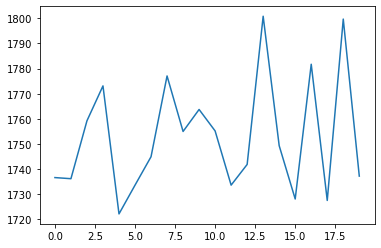

In [22]:
plt.plot(train_losses)
plt.show()